In [1]:
import pandas as pd

df = pd.read_csv("diabetes.csv")

In [2]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


There are many columns like Gllucose, BloodPressure, SkinThickness, Insulin And BMI which has values equal to 0. It measns these columns actually have missing values so we will impute it by different techniques and if we drop these values we lost our data.

In [8]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [9]:
import numpy as np

df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [10]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [11]:
df[df['Outcome'] == 0]['Insulin'].median()

np.float64(102.5)

In [12]:
df[df['Outcome'] == 1]['Insulin'].median()

np.float64(169.5)

### Filling Missing Values

In [13]:
def median_values(col):
    print("Not Diabetes",df[df['Outcome'] == 0][col].median())
    print("Diabetes    ",df[df['Outcome'] == 1][col].median())

### Insulin

In [14]:
median_values('Insulin')

Not Diabetes 102.5
Diabetes     169.5


Insulin's medians by the target are really different ! 102.5 for a healthy person and 169.5 for a diabetic person

In [15]:
df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()), 'Insulin'] = 102.5

In [16]:
df.loc[(df['Outcome'] == 1) & (df['Insulin'].isnull()),'Insulin'] = 169.5

### Glucose

In [17]:
median_values("Glucose")

Not Diabetes 107.0
Diabetes     140.0


In [18]:
df.loc[(df['Outcome'] == 0) & (df['Glucose'].isnull()), 'Glucose'] = 107.0
df.loc[(df['Outcome'] == 1) & (df['Glucose'].isnull()), 'Glucose'] = 140.0

### SkinThickness

In [19]:
median_values('SkinThickness')

Not Diabetes 27.0
Diabetes     32.0


In [20]:
df.loc[(df['Outcome'] == 0) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 27.0
df.loc[(df['Outcome'] == 1) & (df['SkinThickness'].isnull()), 'SkinThickness'] = 32.0

### BloodPressure

In [21]:
median_values('BloodPressure')

Not Diabetes 70.0
Diabetes     74.5


In [22]:
df.loc[(df['Outcome'] == 0) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 70.0
df.loc[(df['Outcome'] == 1) & (df['BloodPressure'].isnull()), 'BloodPressure'] = 74.5


### BMI

In [23]:

median_values('BMI')

Not Diabetes 30.1
Diabetes     34.3


In [24]:
df.loc[(df['Outcome'] == 1) & (df['BMI'].isnull()), 'BMI'] = 34.3
df.loc[(df['Outcome'] == 0) & (df['BMI'].isnull()), 'BMI'] = 30.1


In [25]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [26]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome'>

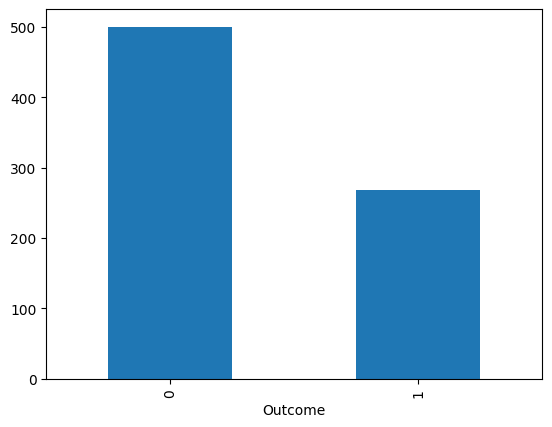

In [27]:
df['Outcome'].value_counts().plot(kind = 'bar')

## EDA

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

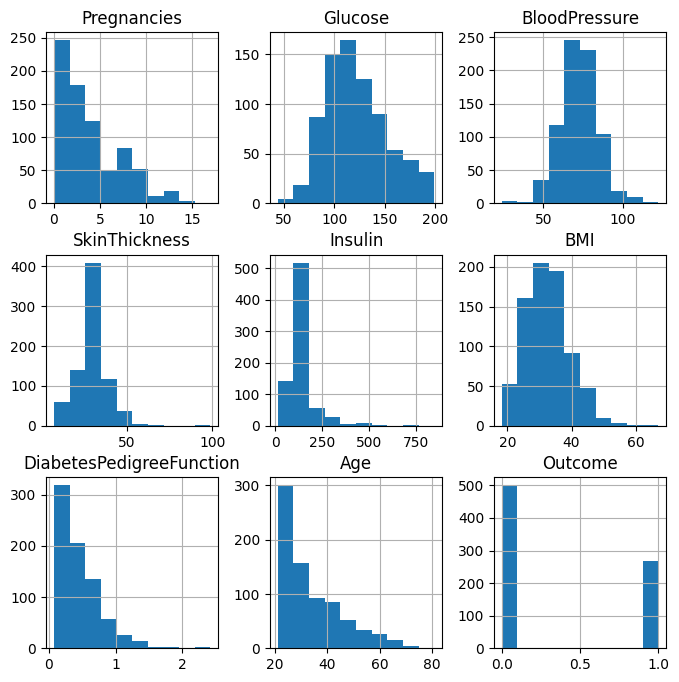

In [28]:
df.hist(figsize = (8,8))

In [29]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

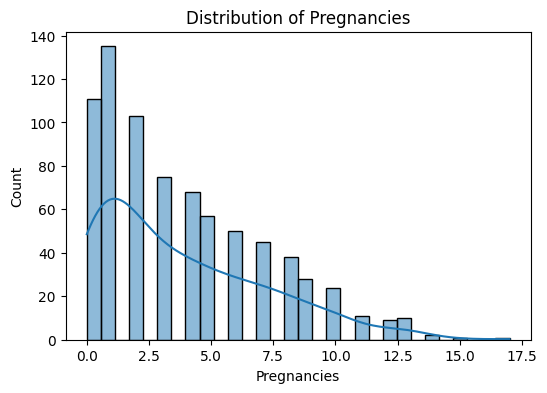

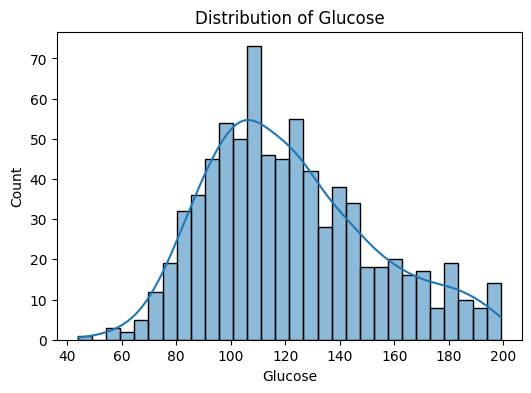

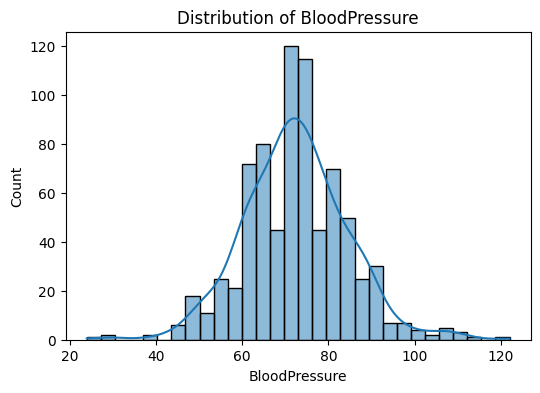

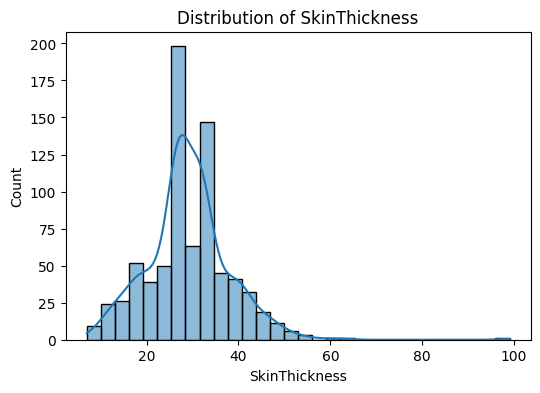

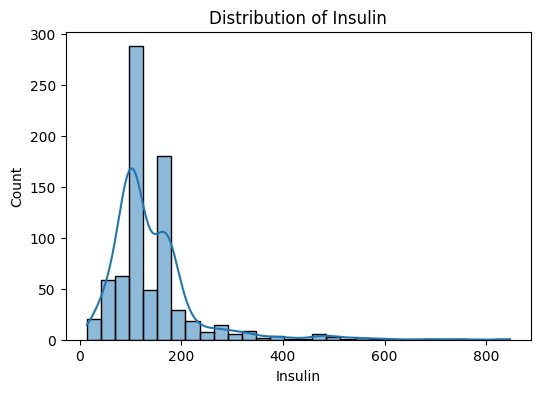

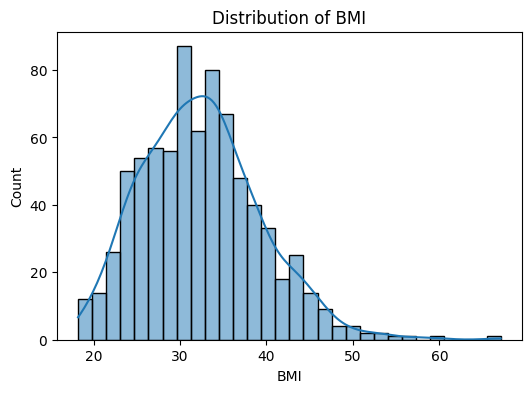

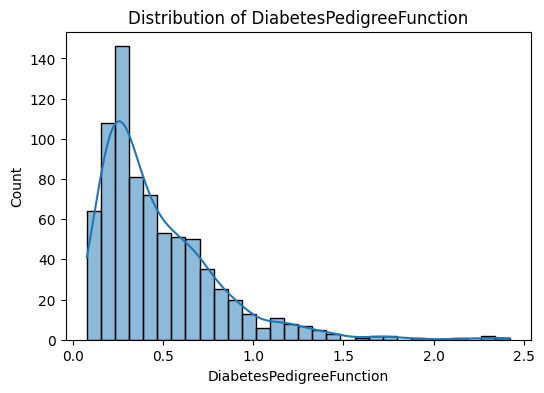

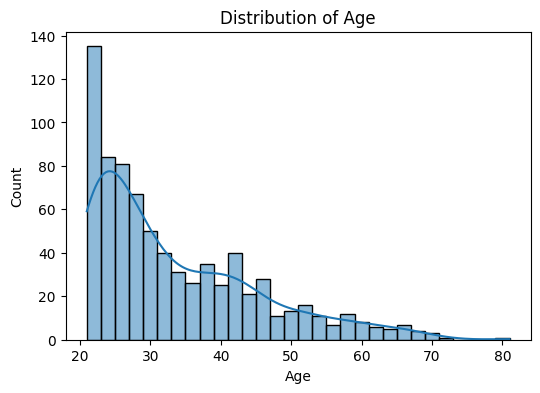

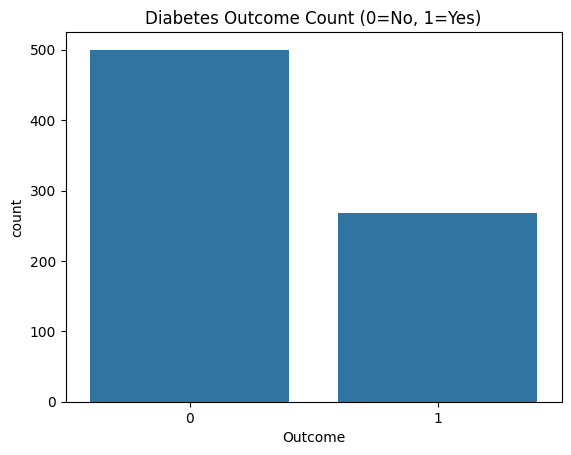

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numerical columns
num_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness',
            'Insulin','BMI','DiabetesPedigreeFunction','Age']

# Distribution plots
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Target variable count
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Count (0=No, 1=Yes)")
plt.show()

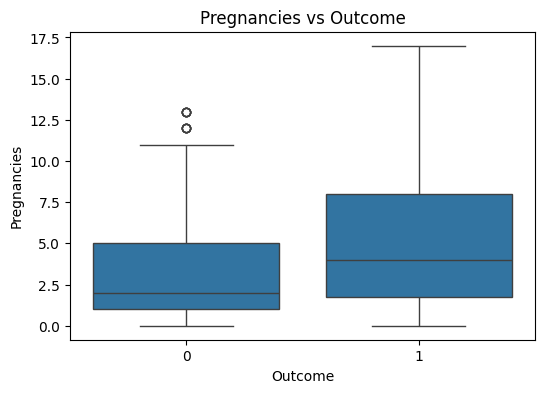

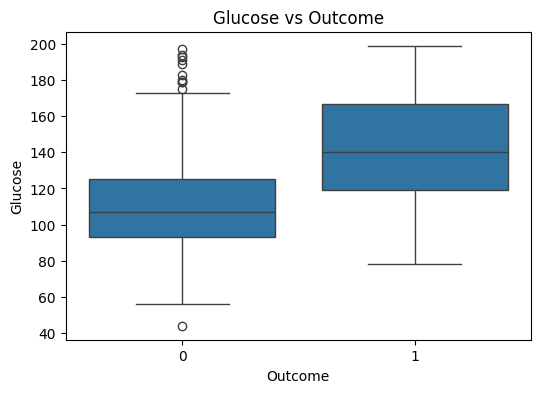

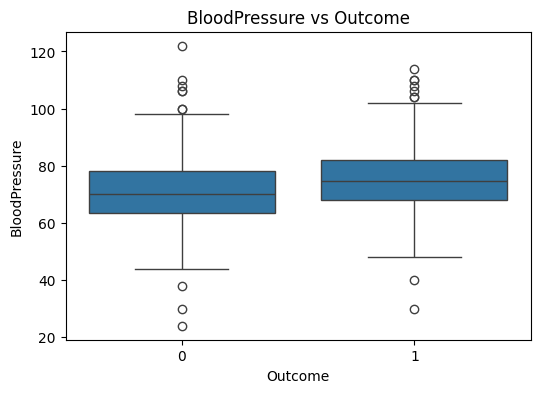

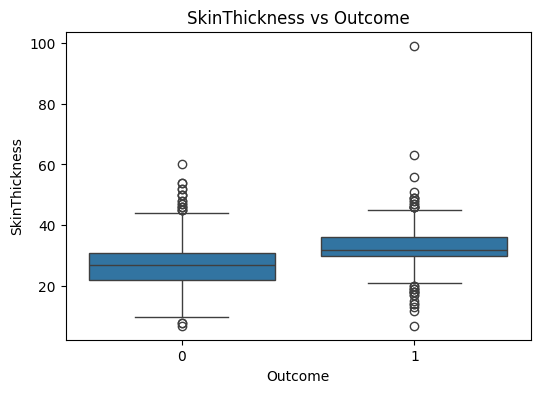

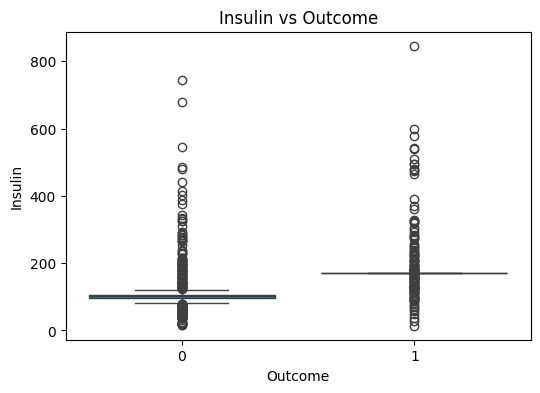

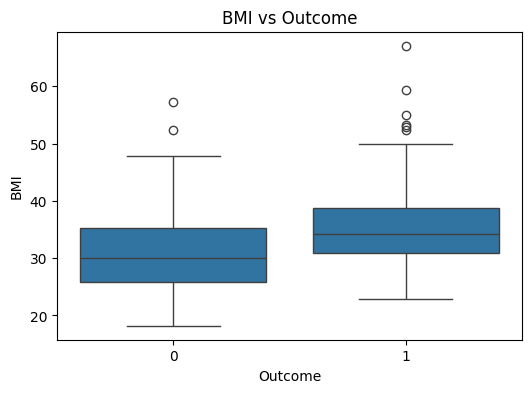

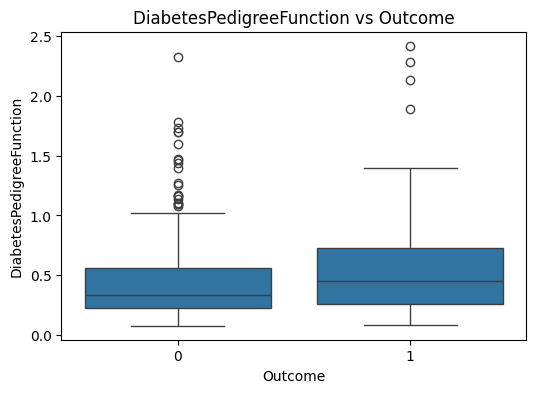

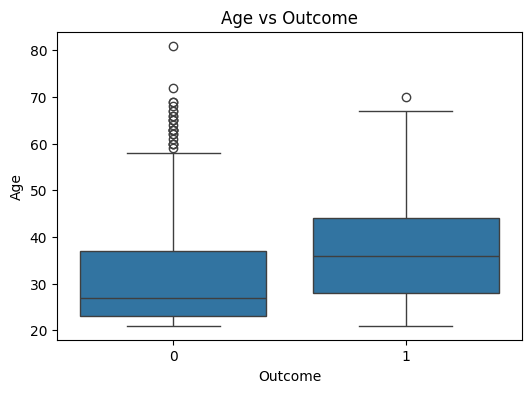

In [31]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Outcome', y=col, data=df)
    plt.title(f'{col} vs Outcome')
    plt.show()

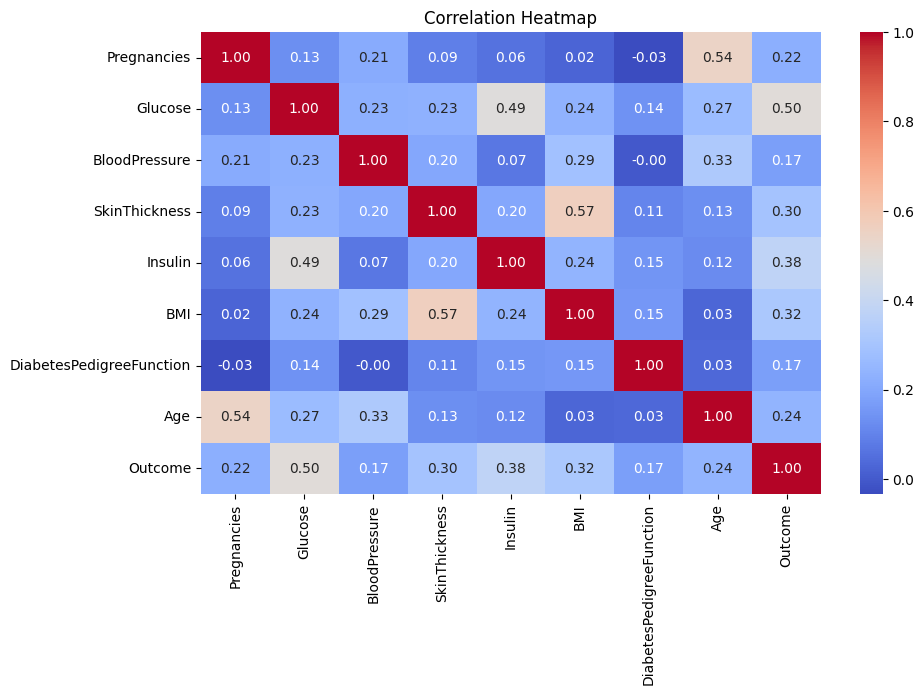

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

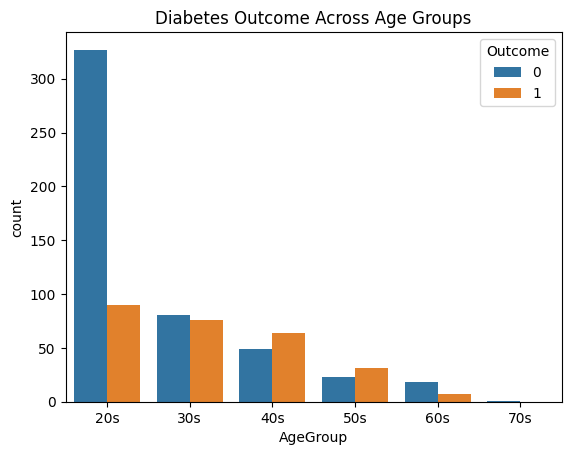

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
df['AgeGroup'] = pd.cut(df['Age'], bins=[20,30,40,50,60,70,80], labels=['20s','30s','40s','50s','60s','70s'])
sns.countplot(x='AgeGroup', hue='Outcome', data=df)
plt.title("Diabetes Outcome Across Age Groups")
plt.show()

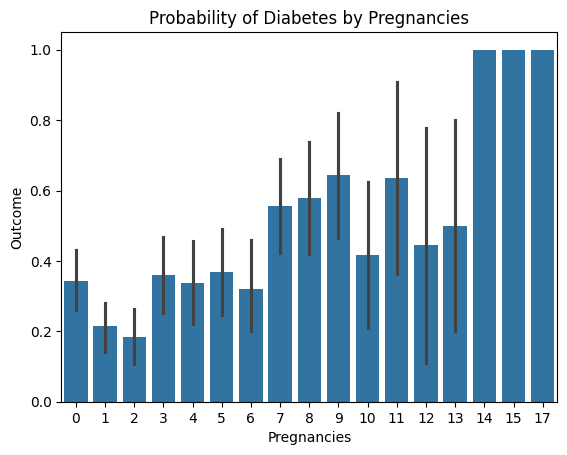

In [34]:
sns.barplot(x='Pregnancies', y='Outcome', data=df, estimator=lambda x: sum(x)/len(x))
plt.title("Probability of Diabetes by Pregnancies")
plt.show()

## 1. Univariate Analysis
- **Pregnancies**: Most women have 0–6 pregnancies, a few outliers with >10.
- **Glucose**: Right-skewed distribution, higher values in diabetic patients.
- **BloodPressure**: Mostly 70–80 mmHg, but unrealistic `0` values found.
- **SkinThickness**: Many `0` values (missing data), otherwise centered around 20 mm.
- **Insulin**: Highly skewed, many `0` values (treated as missing).
- **BMI**: Normally distributed around 30, some invalid `0` values.
- **DiabetesPedigreeFunction**: Right-skewed with some extreme values.
- **Age**: Majority between 20–40 years, extends up to 80.
- **Outcome**: Imbalanced target (more `0` = Non-diabetic, fewer `1` = Diabetic).

---

## 2. Bivariate Analysis (Feature vs Outcome)
- **Glucose vs Outcome**: Higher glucose strongly linked with diabetes.
- **BMI vs Outcome**: Overweight/obese patients more likely to have diabetes.
- **Age vs Outcome**: Risk increases with age, especially above 40 years.
- **Pregnancies vs Outcome**: More pregnancies correlated with diabetes risk.
- **BloodPressure, SkinThickness, Insulin**: Weak direct relationship, but missing data might hide trends.

---

## 3. Multivariate Analysis
- **Correlation Heatmap**:
  - Strong positive correlation of diabetes with **Glucose** and **BMI**.
  - Weak correlations among other features.
- **Pairplot**:
  - Clear separation in diabetic vs non-diabetic groups when combining **Glucose, BMI, Age**.

---

## 4. Extra Insights
- **Age Groups**: Patients above 40 have a significantly higher risk.
- **Pregnancies**: 6+ pregnancies associated with higher probability of diabetes.

## Preparing Data

In [35]:
X = df.drop(columns = ['Outcome','AgeGroup'],axis = 1)
y = df['Outcome']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,stratify = y,random_state = 42)

### Scaled Data

In [37]:
from sklearn.preprocessing import MinMaxScaler
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [38]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])
X_test_scaled = scaler.fit_transform(X_test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [39]:

# Convert back to DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

In [40]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_train.columns)

## Model Building

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Pregnancies               768 non-null    int64   
 1   Glucose                   768 non-null    float64 
 2   BloodPressure             768 non-null    float64 
 3   SkinThickness             768 non-null    float64 
 4   Insulin                   768 non-null    float64 
 5   BMI                       768 non-null    float64 
 6   DiabetesPedigreeFunction  768 non-null    float64 
 7   Age                       768 non-null    int64   
 8   Outcome                   768 non-null    int64   
 9   AgeGroup                  767 non-null    category
dtypes: category(1), float64(6), int64(3)
memory usage: 55.1 KB


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(X_train,y_train)
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       100
           1       0.59      0.56      0.57        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.70      0.71      0.71       154



D:\AI_ML_Projects\diabetes_prediction\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       100
           1       0.72      0.76      0.74        54

    accuracy                           0.81       154
   macro avg       0.79      0.80      0.80       154
weighted avg       0.81      0.81      0.81       154



In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(X_train_scaled,y_train)
print(classification_report(y_test,model.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       100
           1       0.59      0.70      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
model = DecisionTreeClassifier()
model.fit(X_train_scaled,y_train)
print(classification_report(y_test,model.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       100
           1       0.69      0.74      0.71        54

    accuracy                           0.79       154
   macro avg       0.77      0.78      0.78       154
weighted avg       0.80      0.79      0.79       154



In [46]:
from sklearn.ensemble import RandomForestClassifier
model_2 = RandomForestClassifier(n_jobs =-1, random_state = 42)
model_2.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [47]:
model_2.score(X_train,y_train)

1.0

Accuracy: 100.00%
Accuracy: 86.36%


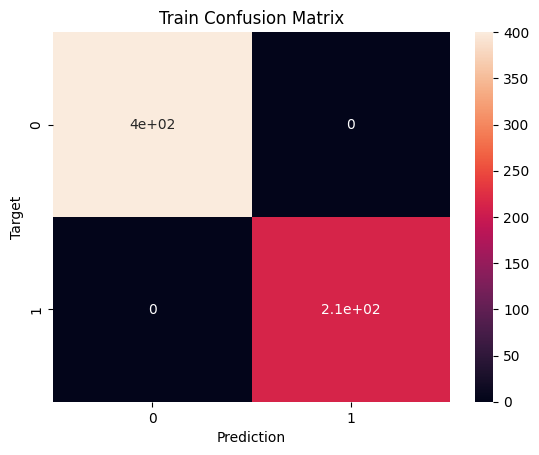

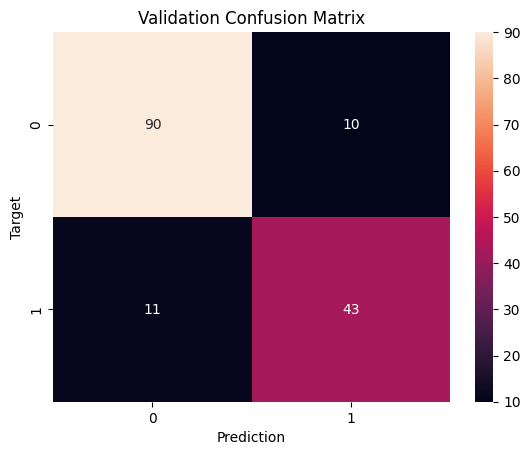

In [48]:
from sklearn.metrics import accuracy_score,confusion_matrix
def predict_and_plot(model, inputs,targets, name = ''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy*100))
    
    cf = confusion_matrix(targets, preds)
    plt.figure()
    sns.heatmap(cf, annot = True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'. format(name))
    
    return preds

train_preds = predict_and_plot(model_2, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(model_2, X_test, y_test, 'Validation')

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

param_grid = {
    'n_estimators': [50, 100, 150],  # Adjust the number of trees in the forest
    'max_depth': [5, 8, 11],  # Adjust the maximum depth of each tree
    'min_samples_split': [2, 5, 7, 9, 11],  # Adjust the minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4, 6, 8]  # Adjust the minimum samples required in a leaf node
}

model = RandomForestClassifier(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

# Evaluate the model on the training and validation data
train_accuracy = best_model.score(X_train, y_train)
val_accuracy = best_model.score(X_test, y_test)

# Print the results
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)

Training Accuracy: 0.9462540716612378
Validation Accuracy: 0.8636363636363636


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
model = RandomForestClassifier(random_state = 42,n_jobs = -1,max_depth = 6,n_estimators = 50,min_samples_split = 3,min_samples_leaf = 1)

model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(classification_report(y_test,model.predict(X_test)))

0.9560260586319218
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       100
           1       0.83      0.81      0.82        54

    accuracy                           0.88       154
   macro avg       0.87      0.86      0.86       154
weighted avg       0.88      0.88      0.88       154



Accuracy: 95.60%
Accuracy: 87.66%


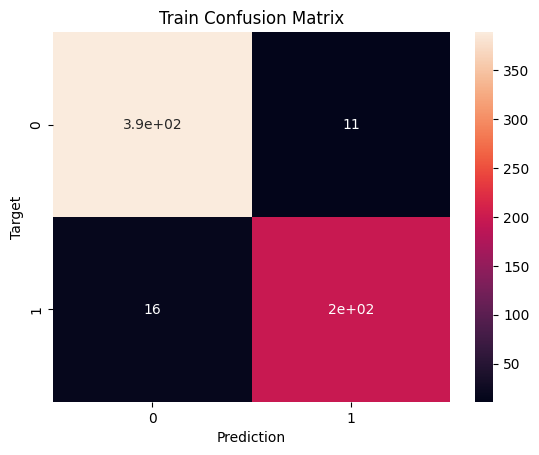

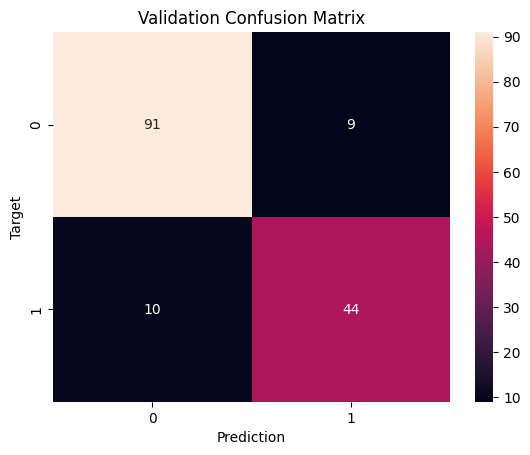

In [51]:
train_preds = predict_and_plot(model, X_train, y_train, 'Train')

# Predict and plot on the validation data
val_preds = predict_and_plot(model, X_test, y_test, 'Validation')

In [52]:
from sklearn.svm import SVC
model_1 = SVC(kernel= 'linear')

model_1.fit(X_train,y_train)
print(model_1.score(X_train,y_train))
print(classification_report(y_test,model_1.predict(X_test)))

0.8110749185667753
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       100
           1       0.62      0.63      0.62        54

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



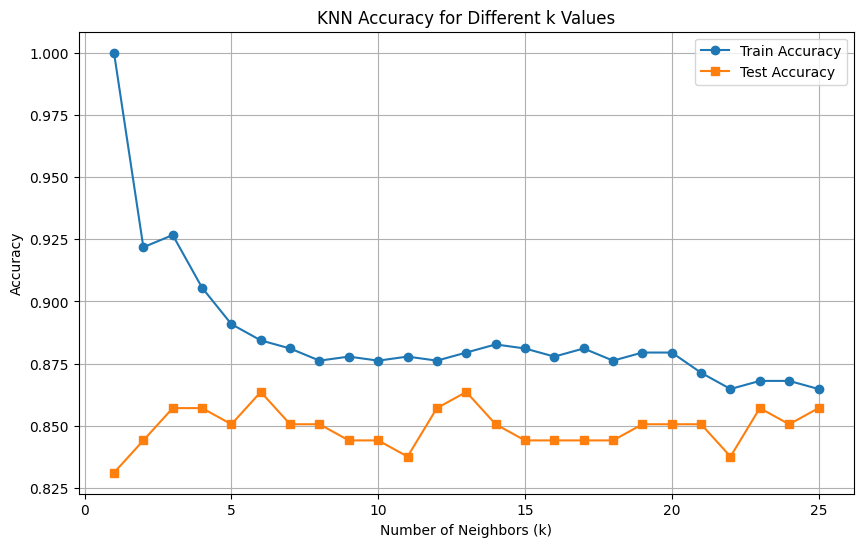

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# ✅ Step 2: Loop over different k values
k_range = range(1, 26)
train_scores = []
test_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)

    train_scores.append(accuracy_score(y_train, train_pred))
    test_scores.append(accuracy_score(y_test, test_pred))

# ✅ Step 3: Plot accuracy
plt.figure(figsize=(10,6))
plt.plot(k_range, train_scores, marker='o', label='Train Accuracy')
plt.plot(k_range, test_scores, marker='s', label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different k Values')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
import joblib
joblib.dump(model,'model.joblib')

['model.joblib']

In [49]:
joblib.dump(scaler,'scaler.joblib')

['scaler.joblib']